# Potato Disease Classification Using Neural Network

Every year, farmers suffer economic losses and crop waste owing to different illnesses in potato plants. We will utilise CNN to classify images and create a smartphone app that will allow a farmer to take a picture of a plant and determine whether or not it has a disease. This project will use the following technology stack:

Model Construction: CNN, TensorFlow, Data Augmentation, and TF Dataset.

1) The project includes data collection, model building using Convolutional Neural Network (CNN), ML ops using TF serving, a backend server using Fast API, deployment to Google Cloud, and a mobile app in React Native.

2) The main problem addressed is the economic losses faced by potato farmers due to early blight and late blight diseases.

3) The application will classify images of potato plants as healthy or having early blight or late blight.

4) The data collection process involves gathering images of healthy potato plant leaves and leaves with early blight or late blight.

5) Data cleaning and pre-processing will be done using tf dataset and data augmentation.

6) Model building will be carried out using CNN, and the trained model will be exported onto the disk.

## IMPORTNG LIBRARIES

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import pandas as pd
import numpy

In [2]:
IMAGE_SIZE = 256
BATCH = 32
CHANNELS = 3
EPOCHS = 50

## CONVERTING IMAGES TO TENSORS

In [3]:
''' For downloading dataset into tensorfolw dataset using keras '''
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\raman\Desktop\mini-projects\potato class\potato", 
     shuffle = True,
     image_size = (IMAGE_SIZE,IMAGE_SIZE),
     batch_size = BATCH) 


Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names    # for printing class names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)  # 68 -> represent number of batches so 68*32 will give total length 

68

In [6]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

'''
32 -> batches
256,256 -> dimensions
3 -> RGB
'''

(32, 256, 256, 3)
[1 0 2 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 0 2 1 0 0 0 0 0 0 1 1 1 1]


'\n32 -> batches\n256,256 -> dimensions\n3 -> RGB\n'

'\nplt.imshow()-> to represent matrix into picture\n'

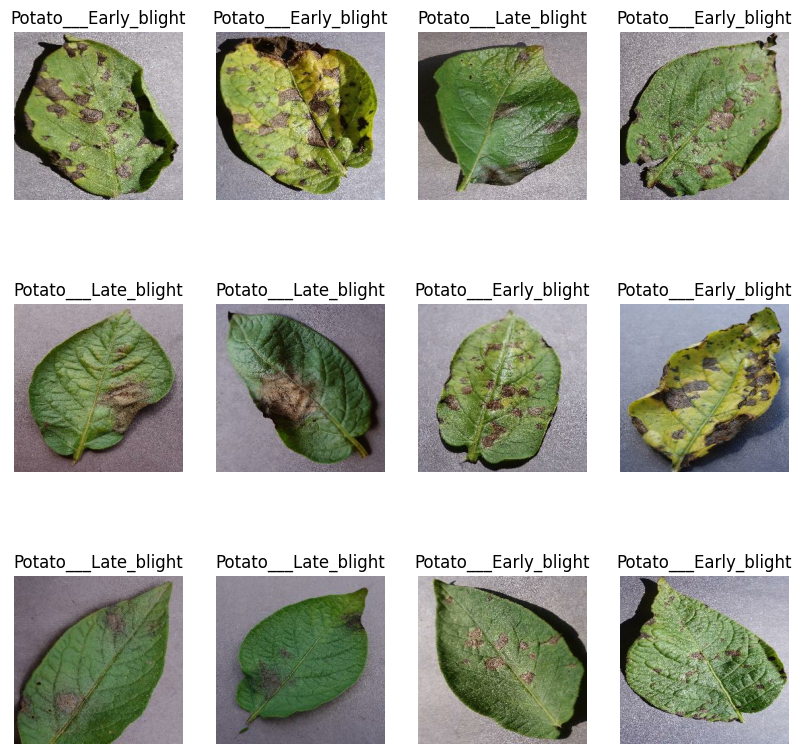

In [7]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

'''
plt.imshow()-> to represent matrix into picture
'''

# DATA SPLITTING

In [8]:
'''
training = 80% data
validation = 10% data
test = 10% data
'''

'\ntraining = 80% data\nvalidation = 10% data\ntest = 10% data\n'

In [9]:
def get_dataset_partition_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    '''
    For Splitting data into training, validation and testing data
    '''
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=12)
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds , val_ds , test_ds

In [10]:
train_ds , val_ds , test_ds = get_dataset_partition_tf(dataset)

In [11]:
len(train_ds) , len(val_ds) , len(test_ds)

(54, 6, 8)

In [12]:
## 

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

## PREPROCESSING

In [13]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
]) ### Adding Layer for rescaling and resizing the data 

##### DATA AUGMENTATION

In [14]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

## Adding 2 Data augmentation filters RandomFlip and RandomRotation 

## MODELLING USING CONVOLUTIONAL NEURAL NETWORK

In [15]:
'''
(convolutional+ReLu --> Pooling)n --> Dense Layer
Pooling :-
        - MAX Pooling
'''

'\n(convolutional+ReLu --> Pooling)n --> Dense Layer\nPooling :-\n        - MAX Pooling\n'

Layers.
       Conv2D(Filter , kernel , activation , input_shape) -> first layer

        Polling2D(kernel)

        Conv2D(filter, kernel, activation)

In [16]:
input_shape = (BATCH,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation="relu",input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3),activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3),activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3),activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3),activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation = "relu"),
    layers.Dense(n_classes,activation = "softmax")
])

model.build(input_shape = input_shape)

In [17]:
model.summary()  # summary of neural network architecture 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [18]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)
## keras.losses.SparseCategoricalCrossentropy

In [19]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/50




54/54 [==============================] - 64s 1s/step - loss: 0.8222 - accuracy: 0.5885 - val_loss: 0.5505 - val_accuracy: 0.7292
Epoch 2/50
54/54 [==============================] - 50s 931ms/step - loss: 0.4443 - accuracy: 0.8137 - val_loss: 0.6161 - val_accuracy: 0.7188
Epoch 3/50
54/54 [==============================] - 50s 933ms/step - loss: 0.3319 - accuracy: 0.8571 - val_loss: 0.3821 - val_accuracy: 0.8802
Epoch 4/50
54/54 [==============================] - 49s 918ms/step - loss: 0.2503 - accuracy: 0.9028 - val_loss: 0.3420 - val_accuracy: 0.8646
Epoch 5/50
54/54 [==============================] - 50s 926ms/step - loss: 0.1589 - accuracy: 0.9369 - val_loss: 0.6096 - val_accuracy: 0.8073
Epoch 6/50
54/54 [==============================] - 47s 871ms/step - loss: 0.6019 - accuracy: 0.7315 - val_loss: 0.3622 - val_accuracy: 0.8438
Epoch 7/50
54/54 [==============================] - 42s 788ms/step - loss: 0.2667 - accuracy: 0.8918 - val_loss: 0.5683 - val_accuracy: 0.7604
Epoch 8/50


In [20]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 7s 255ms/step - loss: 0.0516 - accuracy: 0.9766


In [21]:
scores

[0.05161502584815025, 0.9765625]

In [22]:
history

In [23]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [24]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [25]:
acc = history.history["accuracy"]
val_acc= history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

Text(0.5, 1.0, 'Training and Validation loss')

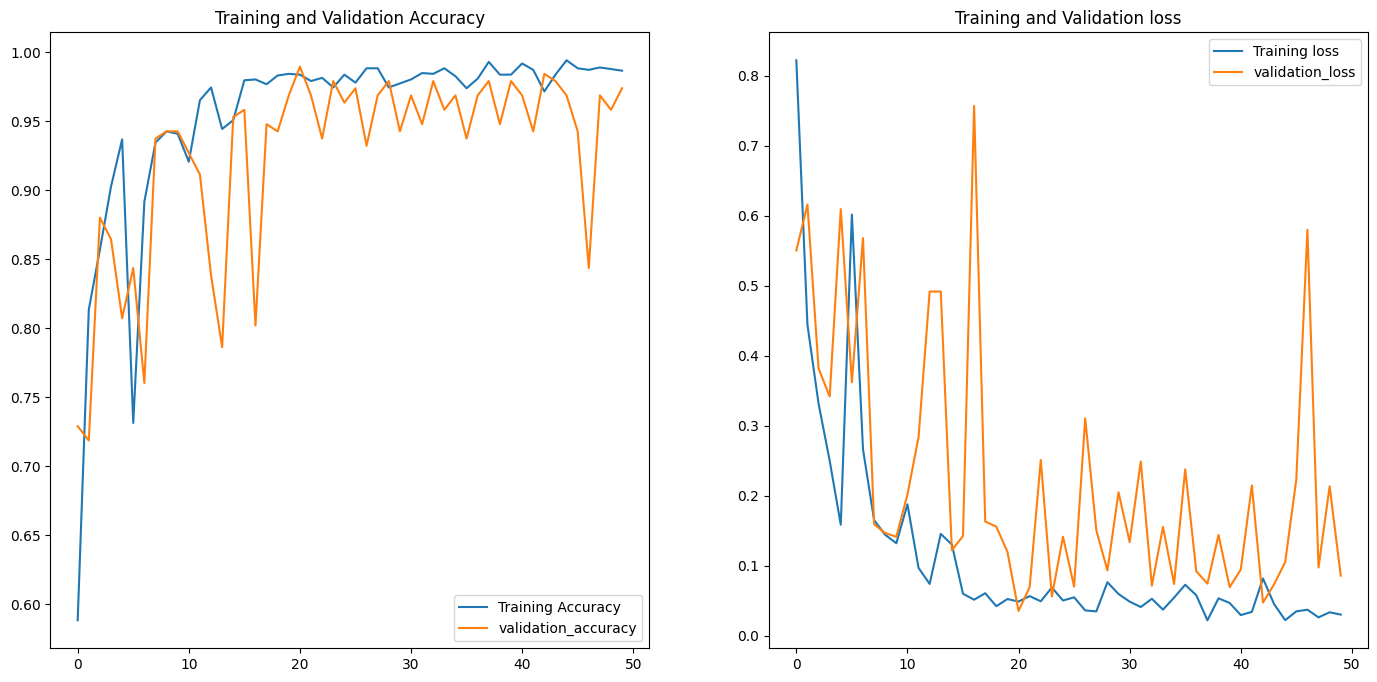

In [26]:
plt.figure(figsize=(17,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label="Training Accuracy")
plt.plot(range(EPOCHS),val_acc,label = "validation_accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label="Training loss")
plt.plot(range(EPOCHS),val_loss,label = "validation_loss")
plt.legend(loc="upper right")
plt.title("Training and Validation loss")

first image to predict
actual label :  Potato___Late_blight
1/1 [==============================] - 1s 817ms/step
Potato___Late_blight


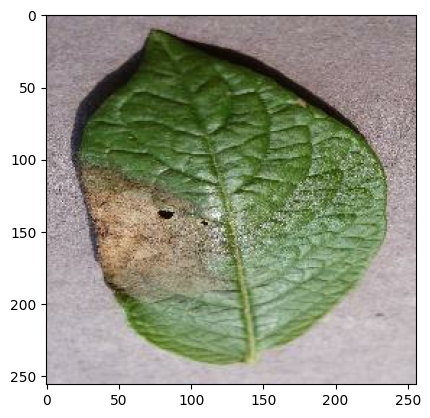

In [27]:
for image_batch,label_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype("uint8")
    first_label = label_batch[0].numpy()
    
    print('first image to predict')
    plt.imshow(first_image)
    print('actual label : ',class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print(class_names[numpy.argmax(batch_prediction[0])])
    

In [28]:
## Defining functions for predicting test dataset results

def predict(model,img):
    img_arry = tf.keras.preprocessing.image.img_to_array((img))
    img_array = tf.expand_dims(img_arry,0)  ## creating a batch
    # prediction
    prediction = model.predict(img_array)
    
    pred_class = class_names[numpy.argmax(prediction[0])]
    confidence = round(100*(numpy.max(prediction[0])),2)
    return pred_class , confidence
    

1/1 [==============================] - 0s 49ms/step


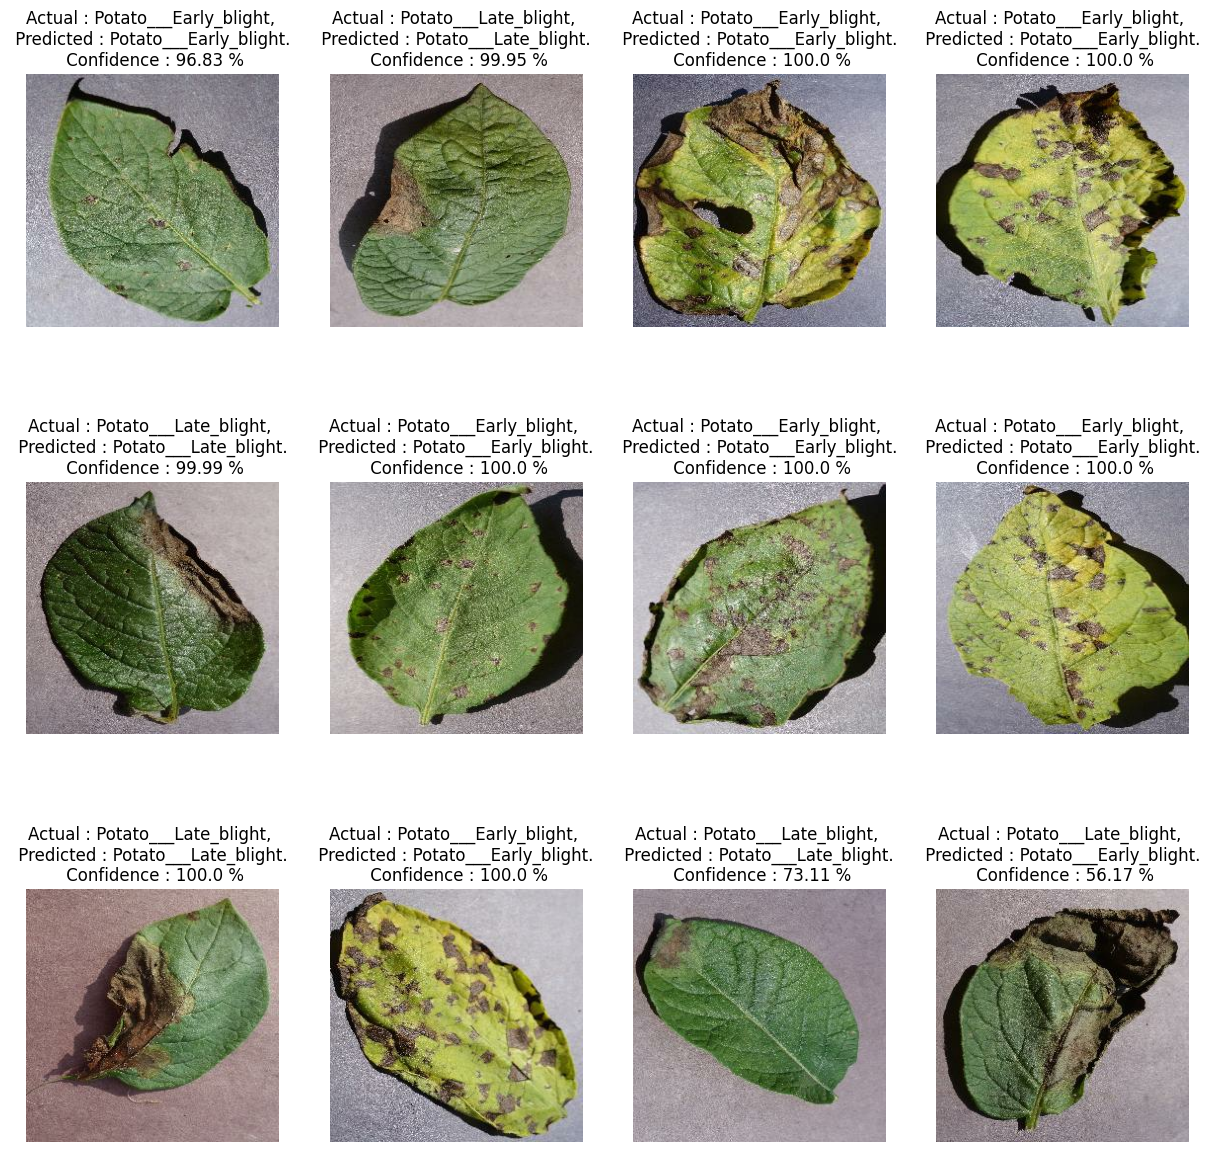

In [29]:
plt.figure(figsize = (15,15))
for images,label in test_ds.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        pred_class , confidence = predict(model,images[i])
        actual_class = class_names[label[i]]
        
        plt.title(f"Actual : {actual_class}, \n Predicted : {pred_class}. \n Confidence : {confidence} %")
        plt.axis('off')

In [30]:
import os
model_version = max([int(i) for i in os.listdir(r"C:\Users\raman\Desktop\mini-projects\potato class\models") + [0]])+1
model.save(f'Potato Disease {model_version}')

INFO:tensorflow:Assets written to: Potato Disease 1\assets


INFO:tensorflow:Assets written to: Potato Disease 1\assets
